# Padding and Total Time

In [1]:
exec(open('ComputeDelays.py').read())

# Generator to Scope - 2 us - 500 kHz

GS_4=timedata('GS_4')
readlabdat('jun27_2.csv',GS_4)

GS_C=timedata('GS_C')
readlabdat('jun27_3.csv',GS_C)

# Decimate Function:

def decimate(lst):
    lst = lst[::10]
    return lst 

# Decimate Raw Data:

y = list(GS_4.data)
x = list(GS_4.time)
y_decimated = decimate(y) 
x_decimated = decimate(x) 
y_decimated = np.array(y_decimated)
x_decimated = np.array(x_decimated)

In [36]:
# Code to Pad Raw Data
zero_num = 100000   # number of zero points we want to add
y_rawpad = np.pad(GS_4.data,zero_num) # np.pad adds zero to both ends
y_rawpad = y_rawpad[zero_num:len(y_rawpad)]   # cut the leading zeros
dx = GS_4.time[2]-GS_4.time[1]   # dt, spacing between time points
newtimes = np.zeros(zero_num)
for i in range(1,zero_num + 1):      # extend time array to accomodate padding
    newtimes[i-1]= GS_4.time[len(GS_4.time)-1] + i*dx

x_rawpad = np.append(GS_4.time,newtimes)

# Code to pad the decimated data
zero_num = 10000   # number of zero points we need to add
y_pad = np.pad(y_decimated,zero_num) # np.pad adds zero to both ends
y_pad = y_pad[zero_num:len(y_pad)]   # cut the leading zeros
dx = x_decimated[2]-x_decimated[1]   # dt, spacing between time points
#dx = GS_4.time[2]-GS_4.time[1] 
newtimes = np.zeros(zero_num)
for i in range(1,zero_num + 1):      # extend time array to accomodate padding
    newtimes[i-1]= x_decimated[len(x_decimated)-1] + i*dx

x_pad = np.append(x_decimated,newtimes)

# Code to Pad Continuous Raw Data

zero_num = 100000   # number of zero points we want to add
y_Cpad = np.pad(GS_C.data,zero_num) # np.pad adds zero to both ends
y_Cpad = y_Cpad[zero_num:len(y_Cpad)]   # cut the leading zeros

dx = GS_C.time[2]-GS_C.time[1]   # dt, spacing between time points
newtimes = np.zeros(zero_num)
for i in range(1,zero_num + 1):      # extend time array to accomodate padding
    newtimes[i-1]= GS_C.time[len(GS_C.time)-1] + i*dx

x_Cpad = np.append(GS_C.time,newtimes)

print(x_rawpad[-1]*1e6)
print(x_pad[-1]*1e6)
print(x_Cpad[-1]*1e6)


1017.9899999999906
1017.900000000001
1017.9899999999906


In [37]:
# FFT of Raw 4 cycle data:
n_GS_4=np.size(GS_4.time)
dt_GS_4=(GS_4.time[2]-GS_4.time[1])*1e6
f_GS_4=np.fft.fftshift(np.fft.fftfreq(n_GS_4,d=dt_GS_4))*1000
FT_GS_4=np.fft.fftshift(np.fft.fft(GS_4.data - np.mean(GS_4.data)))

# FFT of Raw continuous data:
n_GS_C=np.size(GS_C.time)
dt_GS_C=(GS_C.time[2]-GS_C.time[1])*1e6
f_GS_C=np.fft.fftshift(np.fft.fftfreq(n_GS_C,d=dt_GS_C))*1000
FT_GS_C=np.fft.fftshift(np.fft.fft(GS_C.data - np.mean(GS_C.data)))

# FFT of Decimated Data:
n_GS_4_dec=np.size(x_decimated)
dt_GS_4_dec=(x_decimated[2]-x_decimated[1])*1e6
f_GS_4_dec=np.fft.fftshift(np.fft.fftfreq(n_GS_4_dec,d=dt_GS_4_dec))*1000
FT_GS_4_dec=np.fft.fftshift(np.fft.fft(y_decimated - np.mean(y_decimated)))

# FFT of Decimated + Padded Data:
n_GS_4_pad=np.size(x_pad)
dt_GS_4_pad=(x_pad[2]-x_pad[1])*1e6
f_GS_4_pad=np.fft.fftshift(np.fft.fftfreq(n_GS_4_pad,d=dt_GS_4_pad))*1000
FT_GS_4_pad=np.fft.fftshift(np.fft.fft(y_pad - np.mean(y_pad)))

# FFT of Padded Continuous Data:
n_GS_Cpad=np.size(x_Cpad)
dt_GS_Cpad=(x_Cpad[2]-x_Cpad[1])*1e6
f_GS_Cpad=np.fft.fftshift(np.fft.fftfreq(n_GS_Cpad,d=dt_GS_Cpad))*1000
FT_GS_Cpad=np.fft.fftshift(np.fft.fft(y_Cpad.data - np.mean(y_Cpad)))

# FFT of Padded 4 cycle Data
n_GS_4_rawpad=np.size(x_rawpad)
dt_GS_4_rawpad=(x_rawpad[2]-x_rawpad[1])*1e6
f_GS_4_rawpad=np.fft.fftshift(np.fft.fftfreq(n_GS_4_rawpad,d=dt_GS_4_rawpad))*1000
FT_GS_4_rawpad=np.fft.fftshift(np.fft.fft(y_rawpad - np.mean(y_rawpad)))



In [38]:
Peak_Pad4 = f_GS_4_rawpad[np.argmax(np.abs(FT_GS_4_rawpad))]
Peak_DecPad4 = f_GS_4_pad[np.argmax(np.abs(FT_GS_4_pad))]
Peak_PadC = f_GS_Cpad[np.argmax(np.abs(FT_GS_Cpad))]

df_PadC = f_GS_Cpad[2]-f_GS_Cpad[1]
df_Pad4 = f_GS_4_pad[2]-f_GS_4_pad[1]
df_DecPad4 = f_GS_4_rawpad[2]-f_GS_4_rawpad[1]

Text(0.5, 1.0, 'Padding Comparison - FFT')

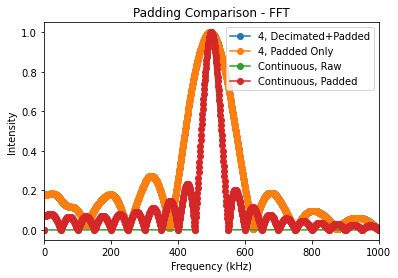

In [39]:
# Normalized Plot
plt.plot(f_GS_4_pad,np.abs(FT_GS_4_pad)/max(np.abs(FT_GS_4_pad)),'-o', label="4, Decimated+Padded")
plt.plot(f_GS_4_rawpad,np.abs(FT_GS_4_rawpad)/max(np.abs(FT_GS_4_rawpad)),'-o', label="4, Padded Only")
plt.plot(f_GS_C,np.abs(FT_GS_C)/max(np.abs(FT_GS_C)),'-o', label="Continuous, Raw")
plt.plot(f_GS_Cpad,np.abs(FT_GS_Cpad)/max(np.abs(FT_GS_Cpad)),'-o', label="Continuous, Padded")

plt.legend()
plt.xlim([0,1000])
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Padding Comparison - FFT')
#plt.savefig("Pad&Dec_GS_norm.jpg",dpi=300)

In [40]:
print("Peak 4 cycle padded:", Peak_Pad4)
print("Peak 4 cycle decimated+padded:", Peak_DecPad4)
print("Peak continuous padded:", Peak_PadC)

print("df 4 cycle padded:", df_Pad4)
print("df 4 cycle decimated+padded:", df_DecPad4)
print("df continuous padded:", df_PadC)

Peak 4 cycle padded: -496.0784313725538
Peak 4 cycle decimated+padded: -496.0784313725486
Peak continuous padded: -499.01960784314196
df 4 cycle padded: 0.9803921568627629
df 4 cycle decimated+padded: 0.9803921568600344
df continuous padded: 0.9803921568600344


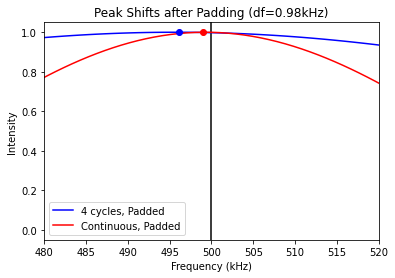

In [43]:
# shoe peak shifts, same data as prev just zoom in to show shift
plt.axvline(x = 500, color = 'k')
plt.plot(f_GS_4_rawpad,np.abs(FT_GS_4_rawpad)/max(np.abs(FT_GS_4_rawpad)), '-b', label="4 cycles, Padded")
plt.plot(f_GS_Cpad,np.abs(FT_GS_Cpad)/max(np.abs(FT_GS_Cpad)), '-r', label="Continuous, Padded")
plt.plot(abs(Peak_Pad4),1,'-bo')#, label = '4 cycle Peak')
plt.plot(abs(Peak_PadC),1,'-ro')#, label = 'Continuous Peak')
plt.xlim([480,520])
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Peak Shifts after Padding (df=0.98kHz)')
plt.legend()


Text(0.5, 0, 'Frequency (kHz)')

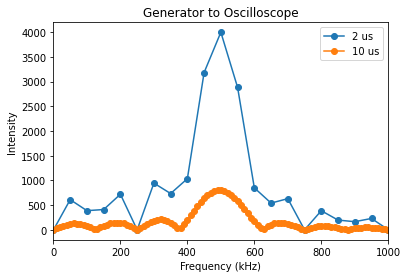

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from myfft import myfft

exec(open('ComputeDelays.py').read())

GS2us=timedata('GS2us')
readlabdat('jun27_2.csv',GS2us)
GS10us=timedata('GS_C')
readlabdat('jun27_5.csv',GS10us)

f2us,FT2us=myfft(GS2us.time, GS2us.data)
f10us,FT10us=myfft(GS10us.time, GS10us.data)

plt.title('Generator to Oscilloscope')
plt.plot(f2us,np.abs(FT2us),'-o', label='2 us')
plt.plot(f10us,np.abs(FT10us),'-o', label='10 us')

plt.xlim([0,1000])
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Frequency (kHz)')

In [11]:
df2 = f2us[2]-f2us[1]
df10 = f10us[2]-f10us[1]

print(df2, "kHz")
print(df10, "kHz")


50.0 kHz
10.000000000001819 kHz


In [12]:
Peak2 = abs(f2us[np.argmax(abs(FT2us))]) 
Peak10 = abs(f10us[np.argmax(abs(FT10us))]) 
print(Peak2, "kHz")
print(Peak10, "kHz")

500.0000000000048 kHz
500.0000000000048 kHz


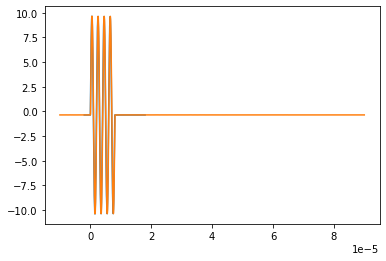

In [13]:
plt.plot(GS2us.time, GS2us.data)
plt.plot(GS10us.time, GS10us.data)